<a href="https://colab.research.google.com/github/endangrusiana123/SLO/blob/main/TugasBesar/CNN_SGD_Optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Besar SLO
<center>

**Kelompok 7**

**"Deep-Learning-Based Diagnosis of Cassava Leaf Diseases Using CNN"**

| No.| Nama | NIM |
|:-----:|:-----:|:-----:|
| 1.  |Endang Rusiana| 201012320036 |
| 2. |Rachelina Putri Arta S|201012320020|
| 3. |Iqbal Kurniawan Perdana|201012320002|
| 4. |Rizky Araffathia|201012320003|

</center>

# Preview dataset

mount G-drive

In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


show sample image

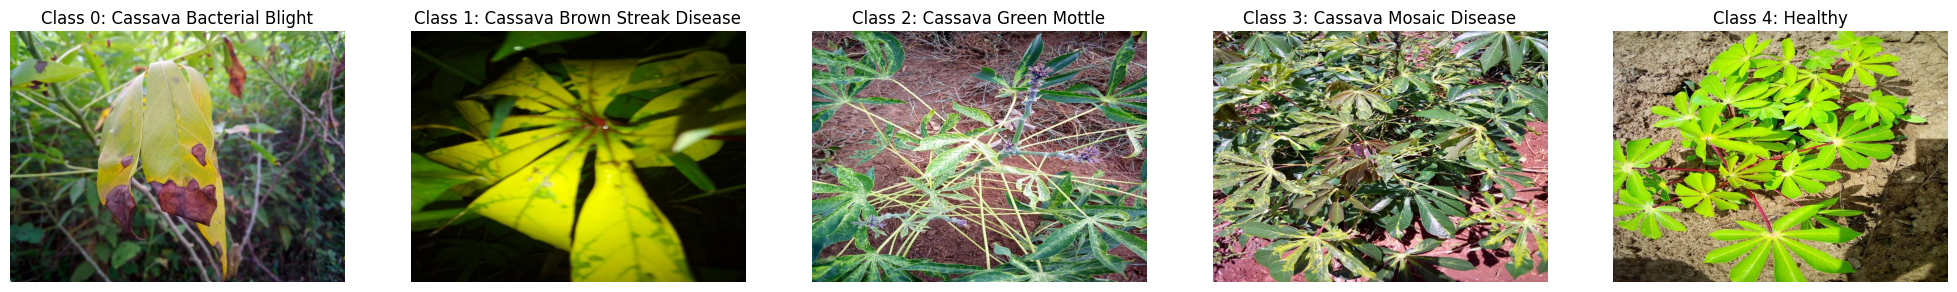

In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Mount Google Drive if your dataset is stored there
# from google.colab import drive
# drive.mount('/content/drive')

# Define the path to the dataset directory
dataset_dir = '/content/drive/MyDrive/Colab Notebooks/SLO/Tugas_Besar/Submit/used_dataset/train'

# Define the class labels
class_labels = [
    'Cassava Bacterial Blight',
    'Cassava Brown Streak Disease',
    'Cassava Green Mottle',
    'Cassava Mosaic Disease',
    'Healthy'
]

# Prepare to collect one sample image from each class
sample_images = []
sample_labels = []
sample_class_numbers = []

# Loop through each class directory and collect one image
for class_index, class_label in enumerate(class_labels):
    class_dir = os.path.join(dataset_dir, str(class_index))
    if os.path.isdir(class_dir):
        for filename in os.listdir(class_dir):
            if filename.endswith(('jpg', 'jpeg', 'png')):
                image_path = os.path.join(class_dir, filename)
                sample_images.append(image_path)
                sample_labels.append(class_label)
                sample_class_numbers.append(class_index)
                break  # Take only one image per class

# Display the sample images
fig, axes = plt.subplots(1, 5, figsize=(25, 10))
for ax, image_path, label, class_number in zip(axes, sample_images, sample_labels, sample_class_numbers):
    img = Image.open(image_path)
    ax.imshow(img)
    ax.set_title(f'Class {class_number}: {label}')
    ax.axis('off')

plt.show()


# Augmentasi Data

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt

# Define parameters
batch_size = 12
im_resize = 224  # Image size (width and height)

train_images_dir = '/content/drive/MyDrive/Colab Notebooks/SLO/Tugas_Besar/Submit/used_dataset/train'
val_images_dir = '/content/drive/MyDrive/Colab Notebooks/SLO/Tugas_Besar/Submit/used_dataset/validation'
test_images_dir = '/content/drive/MyDrive/Colab Notebooks/SLO/Tugas_Besar/Submit/used_dataset/test'

def preprocess_image(image):
    image = tf.image.resize(image, [im_resize, im_resize])  # Resize to target size after center crop
    return image

train_datagen = ImageDataGenerator(
    rotation_range=20,         # Rotate images by up to 20 degrees
    fill_mode='nearest',
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_image,  # Apply the custom preprocessing function
    rescale=1./255
)

val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_image,  # Apply the custom preprocessing function
    rescale=1./255
)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_image,  # Apply the custom preprocessing function
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    train_images_dir,
    target_size=(im_resize, im_resize),  # Ensure target size matches crop size
    batch_size=batch_size,
    class_mode='categorical',  # Use 'sparse' for sparse categorical crossentropy
    shuffle=True  # Shuffle training data
)

val_generator = val_datagen.flow_from_directory(
    val_images_dir,
    target_size=(im_resize, im_resize),  # Ensure target size matches crop size
    batch_size=batch_size,
    class_mode='categorical',  # Use 'sparse' for sparse categorical crossentropy
    shuffle=False  # No need to shuffle validation data
)

test_generator = val_datagen.flow_from_directory(
    test_images_dir,
    target_size=(im_resize, im_resize),  # Ensure target size matches crop size
    batch_size=batch_size,
    class_mode='categorical',  # Use 'sparse' for sparse categorical crossentropy
    shuffle=False  # No need to shuffle validation data
)

# Display some sample data
for i in range(5):
    img, label = train_generator.next()
    print(f"Training Batch {i+1}:")
    print(f"Images shape: {img.shape}")
    print(f"Labels: {label}")

# Display some sample data
for i in range(5):
    img, label = val_generator.next()
    print(f"Validation Batch {i+1}:")
    print(f"Images shape: {img.shape}")
    print(f"Labels: {label}")

# Display some sample data
for i in range(5):
    img, label = test_generator.next()
    print(f"Validation Batch {i+1}:")
    print(f"Images shape: {img.shape}")
    print(f"Labels: {label}")

Found 300 images belonging to 5 classes.
Found 100 images belonging to 5 classes.
Found 100 images belonging to 5 classes.
Training Batch 1:
Images shape: (12, 224, 224, 3)
Labels: [[0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]
Training Batch 2:
Images shape: (12, 224, 224, 3)
Labels: [[0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]
Training Batch 3:
Images shape: (12, 224, 224, 3)
Labels: [[0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]]
Training Batch 4:
Images shape: (12, 224, 224, 3)
La

# CNN: Transfer learning EfficientNet with SGD Optimizer

In [4]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load Pretrained EfficientNetB0 Model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Create a new model on top
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=SGD(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Callbacks for early stopping and learning rate reduction
callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)
]

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=val_generator, callbacks=callbacks)

# Unfreeze some layers in the base model for fine-tuning
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Recompile the model with a lower learning rate
model.compile(optimizer=SGD(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the entire model
fine_tune_history = model.fit(train_generator, epochs=20, validation_data=val_generator, callbacks=callbacks)


16705208/16705208 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 batch_normalization (Batch  (None, 1280)              5120      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dropout (Dropout)           (None, 512)               0 

Show best epoch

In [5]:
import numpy as np
# Get the best epoch based on validation accuracy
best_epoch = np.argmax(fine_tune_history.history['val_accuracy']) + 1
best_val_accuracy = max(fine_tune_history.history['val_accuracy'])

print("Best epoch based on validation accuracy:", best_epoch)
print("Best validation accuracy:", best_val_accuracy)


Best epoch based on validation accuracy: 1
Best validation accuracy: 0.20000000298023224


plot accuracy

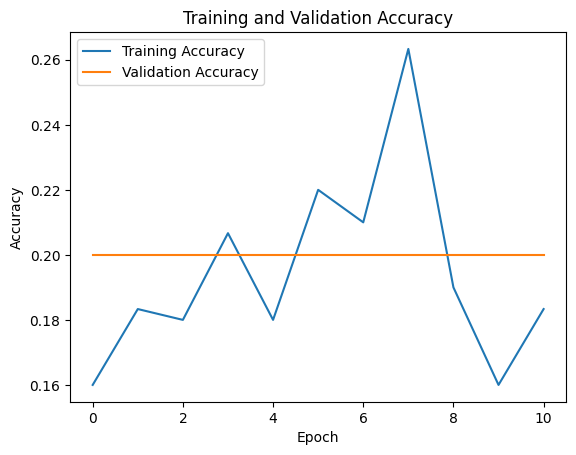

In [6]:

# Plot accuracy for each epoch
plt.plot(fine_tune_history.history['accuracy'], label='Training Accuracy')
plt.plot(fine_tune_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plot loss

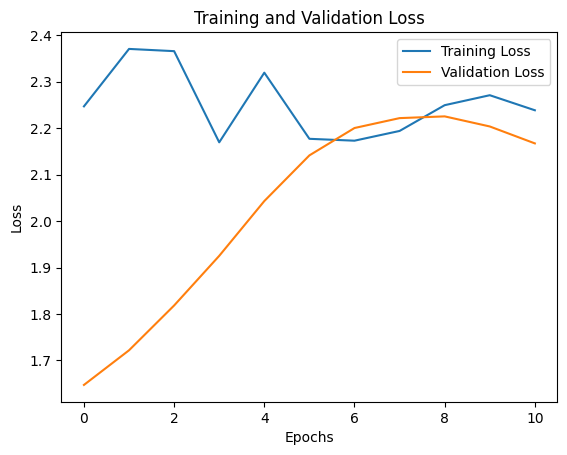

In [7]:

# Plotting the loss
plt.plot(fine_tune_history.history['loss'], label='Training Loss')
plt.plot(fine_tune_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Testing

9/9 [==============================] - 19s 2s/step
Accuracy: 0.2
Classification Report:
               precision    recall  f1-score   support

           0       0.20      1.00      0.33        20
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        20

    accuracy                           0.20       100
   macro avg       0.04      0.20      0.07       100
weighted avg       0.04      0.20      0.07       100

Sensitivity (Recall): 0.0
Specificity: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


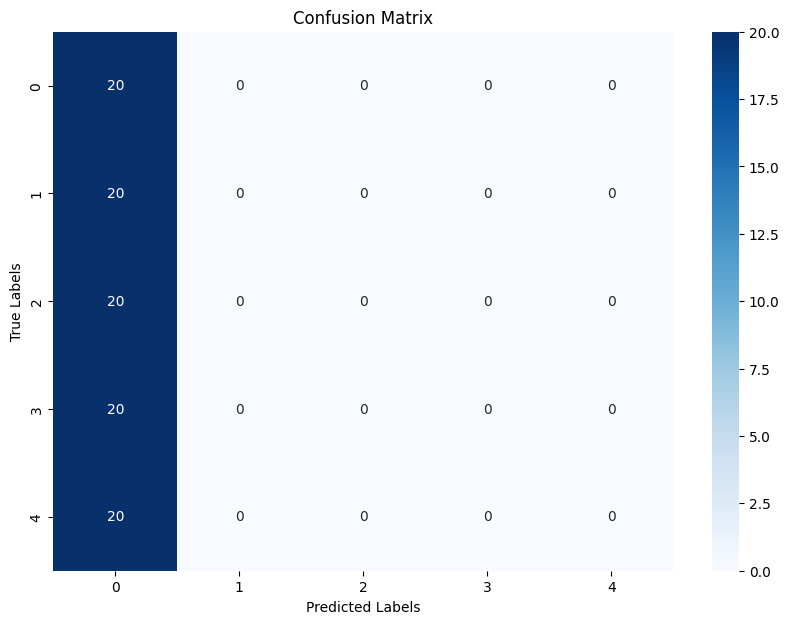

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Make predictions on the test dataset
test_predictions = model.predict(test_generator)

# Get true labels from the test generator
true_labels = test_generator.classes

# Get predicted labels by choosing the class with highest predicted probability
predicted_labels = np.argmax(test_predictions, axis=1)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Calculate classification report (includes precision, recall, f1-score)
class_report = classification_report(true_labels, predicted_labels, target_names=test_generator.class_indices.keys())

# Extract sensitivity (recall) and specificity from the confusion matrix
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Display results
print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()